In [1]:
from merit import solve_problem
from helpers import swiss_nsf, plot_intervals

First, we generate 10 intervals.

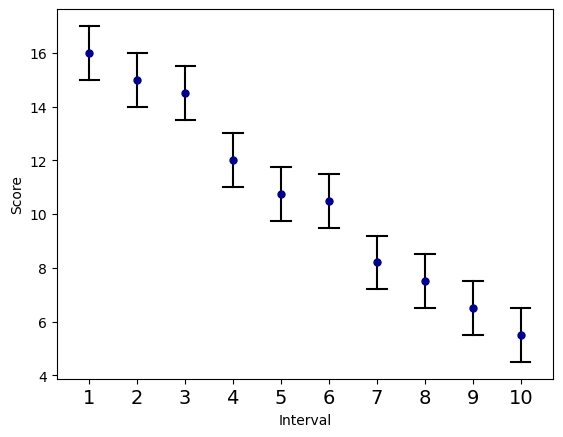

In [2]:
x = [16, 15, 14.5, 12, 10.75, 10.5, 8.2, 7.5, 6.5, 5.5]
w = 1 
I = [(y-w, y+w) for y in x]

_ = plot_intervals(I, x=x)

We will choose k=4 out of 10 intervals using both MERIT (solve_problem) and the Swiss NSF's rule.

In [3]:
k = 4

In [4]:
p_merit, v_merit, info = solve_problem(I, k)

In [5]:
p_merit

array([1.        , 1.        , 1.        , 0.33333333, 0.33333333,
       0.33333333, 0.        , 0.        , 0.        , 0.        ])

In [6]:
p_swiss = swiss_nsf(I, x, k)

In [7]:
p_swiss

[1, 1, 1, 1.0, 0, 0, 0, 0, 0, 0]